In [2]:
# pull down the aerial ortho mosaic tiff needed for the Zostera project   
# this file contains Red, Green, Blue and Near Infrared Data

# This file is shared on OneDrive to anyone with the download link
# to make this work with wget, replace the text after the ? in the link with 'download=1'
# more information at https://www.raspberrypi.org/forums/viewtopic.php?t=212257

# this download make take a min or so
!wget -O PQ_RCD_50cm_Cubic.tif https://nscc-my.sharepoint.com/:i:/g/personal/w0001006_campus_nscc_ca/EeGmrgtNc9ZErvlXcVXfNaABsgdvFf7XTX-RprngA9KaCA?download=1

--2021-03-09 01:47:16--  https://nscc-my.sharepoint.com/:i:/g/personal/w0001006_campus_nscc_ca/EeGmrgtNc9ZErvlXcVXfNaABsgdvFf7XTX-RprngA9KaCA?download=1
Resolving nscc-my.sharepoint.com (nscc-my.sharepoint.com)... 13.107.136.9
Connecting to nscc-my.sharepoint.com (nscc-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/w0001006_campus_nscc_ca/Documents/For_Kevin/PQ_RCD_50cm_Cubic.tif?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzppOi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VlR21yZ3ROYzlaRXJ2bFhjVlhmTmFBQnNnZHZGZjdYVFgtUnBybmdBOUthQ0E_cnRpbWU9ZGpiaVI1M2kyRWc [following]
--2021-03-09 01:47:22--  https://nscc-my.sharepoint.com/personal/w0001006_campus_nscc_ca/Documents/For_Kevin/PQ_RCD_50cm_Cubic.tif?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzppOi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VlR21yZ3ROYzlaRXJ2bFhjVlhmTmFBQnNnZHZGZjdYVFgtUnBybmdBOUthQ0E_cnRpbWU9ZGpiaVI1M2kyRWc
Reusing existi

In [5]:
# we can open the file using imageio, its quite large!
import imageio
b = '/content/PQ_RCD_50cm_Cubic.tif'
a = imageio.imread(b)
print(a.shape)

(21450, 21710, 4)


In [7]:
# or we can use tifffile as well, same size!
import tifffile
b = '/content/PQ_RCD_50cm_Cubic.tif'
a = tifffile.imread(b)
print(a.shape)

(21450, 21710, 4)


In [9]:
# to show the file to the screen, lets reduce it down by a factor of 100
# lets also remove the Near Infrared channel for now
aSmall = a[::100,::100,0:3]
print(aSmall.shape)

(215, 218, 3)


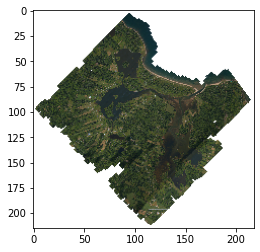

In [10]:
# now lets show it with matplotlib
from matplotlib import pyplot as plt
plt.imshow(aSmall)
plt.show()

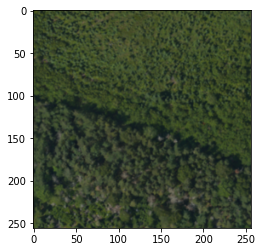

In [14]:
# lets grab a tile 256x256 from the middle of the image
# this is an arbitrary location, for testing
xMid = int(21450/2)
yMid = int(21710/2)
aMid = a[xMid:xMid+256,yMid:yMid+256,0:3]
plt.imshow(aMid)
plt.show()

In [12]:
# lets pull down our library and apply our classification model
!git clone https://github.com/NSCC-COGS/Aestheta.git
%cd /content/Aestheta/
!git pull
import Aestheta.Library.core as core

Cloning into 'Aestheta'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 220 (delta 103), reused 153 (delta 54), pack-reused 0
Receiving objects: 100% (220/220), 4.59 MiB | 15.68 MiB/s, done.
Resolving deltas: 100% (103/103), done.
/content/Aestheta
Already up to date.


['simpleClassifier_20210302180953_64_HelloEarth100.aist', 'simpleClassifier_20210228221023_32_HelloEarth.aist', 'simpleClassifier_20210228223109_32_HelloEarth100.aist']
getting most recent model
20210302180953
20210228221023
20210228223109
Models/simpleClassifier_20210302180953_64_HelloEarth100.aist
applying classification...


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


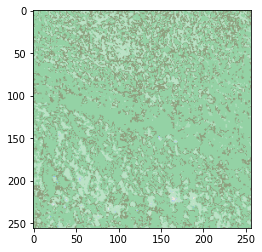

In [15]:
# because this image is RGB, we can apply our most recent model 
img_classMid = core.classifyImage(aMid)
plt.imshow(img_classMid)
plt.show()
# note: the results arent good! (thats ok)

In [11]:
# lets make a plot showing where this mid tile is located in the larger scene

# first lets take a look at the values of the upper left corner
print(aSmall[0,0,:])

[255 255 255]


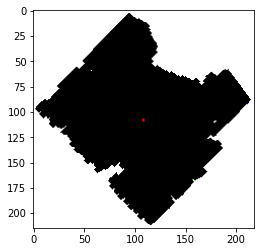

In [16]:
# we see that the white background 'no data' has a value of R,G,B = 255,255,255

# lets make a new array with the same size and shape of the overview and set it all to Zero 
aSmall_zero = aSmall*0

# now lets carry over the white 'no data' to the new array 
aSmall_zero[aSmall==[255,255,255]]=255

# the location of the mid tile in the overview is the mid of the initial array, factored by 100
xMidSmall = int(xMid/100)
yMisSmall = int(yMid/100)

# the 256x256 array will be approximately 3 pixels wide in the overview, 
# lets set that location red by setting band 0 to 255
aSmall_zero[xMidSmall:xMidSmall+3,yMisSmall:yMisSmall+2,0]=255
plt.imshow(aSmall_zero)
plt.show()

['simpleClassifier_20210302180953_64_HelloEarth100.aist', 'simpleClassifier_20210228221023_32_HelloEarth.aist', 'simpleClassifier_20210228223109_32_HelloEarth100.aist']
getting most recent model
20210302180953
20210228221023
20210228223109
Models/simpleClassifier_20210302180953_64_HelloEarth100.aist
applying classification...


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


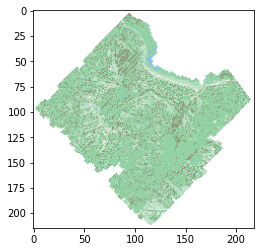

In [18]:
# Now, lets apply the model to the shrunken overview as well
aSmall_class = core.classifyImage(aSmall)
plt.imshow(aSmall_class)
plt.show()

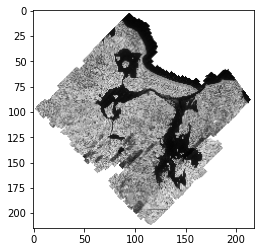

In [24]:
# Out model currently does not accept 4 bands 
# but quickly, lets take a peek at infrared band as well
aSmall_NIR = a[::100,::100,3]
plt.imshow(aSmall_NIR, cmap='gray')
plt.show()

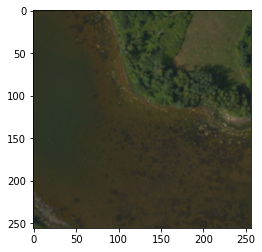

In [36]:
# lets focus on an area with water, holding onto that near infrared
xWater= int(13000)
yWater = int(12500)
aWater_RGBN = a[xWater:xWater+256,yWater:yWater+256,:]
aWater_RGB = aWater_RGBN[:,:,0:3]
plt.imshow(aWater_RGB)
plt.show()

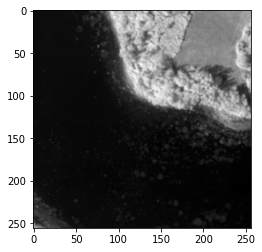

In [37]:
# Near infrared energy is absorbed in water appraing opaque and resulting in a lower/darker observed signal 
aWater_NIR = aWater_RGBN[:,:,3]
plt.imshow(aWater_NIR, cmap='gray')
plt.show()

['simpleClassifier_20210302180953_64_HelloEarth100.aist', 'simpleClassifier_20210228221023_32_HelloEarth.aist', 'simpleClassifier_20210228223109_32_HelloEarth100.aist']
getting most recent model
20210302180953
20210228221023
20210228223109
Models/simpleClassifier_20210302180953_64_HelloEarth100.aist
applying classification...


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


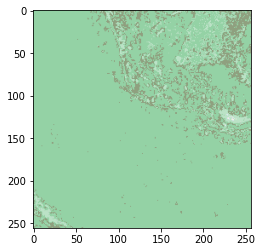

In [38]:
# Since were here! Lets take a look at the model again using rh RGB.
aWater_class = core.classifyImage(aWater_RGB)
plt.imshow(aWater_class)
plt.show()

In [ ]:
# classified as ground! So clearly we have some work to do :D

In [41]:
# Hey! we can get some more data for the project as well
# we can get bathymetric lidar and a zipped ground truth shapefile
# more on these later!

%cd /content/
!wget -O PQ_Lidar_DEMo13.tif https://nscc-my.sharepoint.com/:i:/g/personal/w0001006_campus_nscc_ca/ETLMGXbg1GpKph8-J0TNs60B-wdefo7rmRwp6FNMdkVOUw?download=1
!wget -O benthic_ground_truth.zip https://nscc-my.sharepoint.com/:u:/g/personal/w0001006_campus_nscc_ca/EaYM7nvthFFPm7MXx357X4UBm-xe1uGJVOOg-WpXbPeWGQ?download=1

/content
--2021-03-09 02:42:05--  https://nscc-my.sharepoint.com/:i:/g/personal/w0001006_campus_nscc_ca/ETLMGXbg1GpKph8-J0TNs60B-wdefo7rmRwp6FNMdkVOUw?download=1
Resolving nscc-my.sharepoint.com (nscc-my.sharepoint.com)... 13.107.136.9
Connecting to nscc-my.sharepoint.com (nscc-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/w0001006_campus_nscc_ca/Documents/For_Kevin/Revised/2018_North_Lidar_Filled_DEMo13.tif?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzppOi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VUTE1HWGJnMUdwS3BoOC1KMFROczYwQi13ZGVmbzdybVJ3cDZGTk1ka1ZPVXc_cnRpbWU9ZnRkMDc2VGkyRWc [following]
--2021-03-09 02:42:09--  https://nscc-my.sharepoint.com/personal/w0001006_campus_nscc_ca/Documents/For_Kevin/Revised/2018_North_Lidar_Filled_DEMo13.tif?originalPath=aHR0cHM6Ly9uc2NjLW15LnNoYXJlcG9pbnQuY29tLzppOi9nL3BlcnNvbmFsL3cwMDAxMDA2X2NhbXB1c19uc2NjX2NhL0VUTE1HWGJnMUdwS3BoOC1KMFROczYwQi13ZGVmbzdybVJ3cDZ